**Assignment 2 - Question 3**
- Provide the answers in the provided cell. 

In [ ]:
# Install some dependencies. We will use transformers and datasets package from Huggingface for our experiments. Uncomment the line below to install the dependencies. 
# !pip install transformers datasets sentencepiece

In [ ]:
# Load the GSM8K dataset. There are two versions: main and Socratic. We are currently interested in main but later on we can explore socratic version. Just pass the name in the command below to load them. 
from datasets import load_dataset
dataset = load_dataset("gsm8k", "main")

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# We test on 100 samples only for all the experiments
test_samples = dataset["test"][:100]

In [ ]:
# Printing a sample from the dataset
# The dataset is a Math Word Problem in the following format. "Ques" represents the main problem and "Solution" contains the step by step solution. The final answer appears after "####"
sample_ques = test_samples["question"][0]
print (f"Ques: {sample_ques}\nSolution: {test_samples['answer'][0]}")

Ques: Janet’s ducks lay 16 eggs per day. She eats three for breakfast every morning and bakes muffins for her friends every day with four. She sells the remainder at the farmers' market daily for $2 per fresh duck egg. How much in dollars does she make every day at the farmers' market?
Solution: Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eggs a day.
She makes 9 * 2 = $<<9*2=18>>18 every day at the farmer’s market.
#### 18


**Ques 1**: We have training dataset available for GSM8K ("train" parameter in dataset) and we start by training an LLM. We use T5 models for all our experiments (T5 and Flan versions). For training, we use T5-small and train it on GSM8K dataset and report the accuracy on the test set as created above. 
- For training and testing, use the train and test scripts provided in the GitHub (https://github.com/openai/grade-school-math/tree/master/grade_school_math). 
- Make sure to replace the GPT2 tokenizer and model with T5-small from Huggingface (also provided below). 
- For testing run sample.py file for all the 100 samples from the test set (from above). No need to modify the calculator code and keep using one. 
- Finally, report the accuracy of the model on the 100 test samples created above.

NOTE: No need to submit the train and sample code. Only the results are enough. The results are expected in .ccsv format with questions in one column and model output in the second column. Accuracy is calculated based on the final answer only (the one after ####).

**Answer 1**:

In [ ]:
#Loading T5 model and analyzing the output out of the box
from transformers import AutoTokenizer, T5ForConditionalGeneration

#Load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained("t5-small", model_max_length=512)
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# lets create an input for the model. Here we are testing with one example question out of the box. 
input_sample = sample_ques

# Pass the sample to the model and print the decoded output
input_ids = tokenizer(input_sample, return_tensors="pt").input_ids
outputs = model.generate(input_ids, max_new_tokens=256)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

and bakes muffins for her friends every day with four. Janet’s ducks lay 16 eggs per day. Janet’s ducks lay 16 eggs per day. Janet sells the remainder at the farmers' market daily for $2 per fresh duck egg.


In [ ]:
from train import train
train("t5-small", num_epochs=20)

**Ques 2:** Finetuning works well for cases when training data is available. But for cases when there is no training data available, we can first test how the pre-trained models work out of the box in a zero-shot setting. 
- Load versions of T5 models [small, base, and large] from [HuggingFace repo](https://huggingface.co/docs/transformers/model_doc/t5) as demonstrated in the example above and run the inference for entire test set of 100 examples. Calculate the accuracy on the test samples and plot a chart demonstrating how the accuracy scales with model sizes.
NOTE: Template to plot the graph in bar chart format is provided at the end of the document. 

**Answer 2**:

In [ ]:
#Loading Flan-T5 model and analyzing the output out of the box
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

# Add the model and the tokenizer here

# Modify the input sample

inputs = tokenizer(input_sample, return_tensors="pt")
outputs = model.generate(**inputs, max_new_tokens=256)
print(tokenizer.batch_decode(outputs, skip_special_tokens=True))

["She sells the remainder at the farmers' market for $2 per fresh duck egg, so she makes 16 * 2 = $120 per duck egg. She makes $2 per duck egg for her friends every day, so she makes 16 * 2 = $120 per duck egg. She makes $2 per duck egg for her friends every day, so she makes $120 * 2 = $120 per duck egg. She makes $2 per duck egg for her friends every day, so she makes $120 * 2 = $120 per duck egg. She makes $2 per duck egg for her friends every day, so she makes $120 * 2 = $120 per duck egg. She makes $120 * 2 = $120 per duck egg. She makes $120 * 2 = $120 per duck egg. She makes $120 * 2 = $120 per duck egg. She makes $120 * 2 = $120 per duck egg. She makes $120 * 2 = $120 per duck egg. She makes $120 * 2 = $120 per duck egg. She makes $120 * 2 = $120 per duck egg. She makes $120 * 2 = $120 per duck egg. She makes $120 * 2 = $120 per duck egg. She makes $120 * 2"]


**Ques 3**: Without specifying what the model should do for a given problem, the model might feel that the task is a typical sentence completion task which might not be desirable for a question-answering task or machine translation task. *Instruction tuning* is an idea to train these LLMs with instructions for each task which if provided during test time, can assist the model to decide how to approach the task. 
- Now repeat the same experiments with Flan T5 models [small, base, and large] (an instruction tuned version of T5) and plot a chart comparing it with the T5 models in the same last plot:
   - without changing the input style and
   - with adding instruction for each input example (Refer to [FlanT5 paper](https://arxiv.org/pdf/2210.11416.pdf) and figure out the instruction that can prove useful for answering GSM8K dataset).
   
   NOTE that all you need is to load the tokenizer and the model in the above code, and provide the input sample in the desired format. Also, the instructions are task specific meaning a common instruction in the input sample will work for all the examples. No need to write different instructions for each example. 

**Answer 3**:

**Ques 4**: Often zero shot inference capabilities can be improved by providing some incontext examples to the model (not true for all cases though). For FlanT5 large model, provide 2-3 incontext examples (should be other than the 100 testing samples) and analyze the performance of the models as following:

   * Only provide the final answer (In the example sample above, it will be "The answer is 18").
   * Replace the final answer only to a step by step explaination also refer to chain of thought reasoning (refer to Figure 11 in the [Flan paper](https://arxiv.org/pdf/2210.11416.pdf) in the Appendix).
   * Plot the approaches along with the other two results for FlanT5 model from part 2. 

   NOTE: The in-context examples should be appended to the provided input in the input sample.

**Answer 4**:

**BONUS Ques**: Can you come up with another style of step by step reasoning prompts that can prove useful (HINT: check the Socratic version of the dataset.). Test your hypothesis with the same FlanT5 model as above and see the difference.  

**BONUS**:

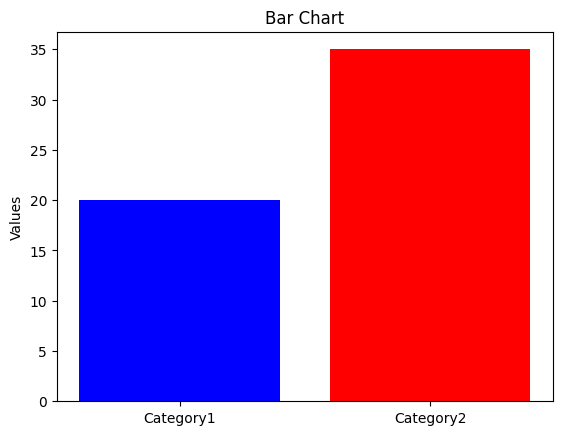

In [ ]:
# Template to plot graphs. 
import matplotlib.pyplot as plt

# Sample data
categories = ['Category1', 'Category2']
values = [20, 35]

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot data
ax.bar(categories, values, color=['blue', 'red'])

# Set the y axis label
ax.set_ylabel('Values')

# Set the chart's title
ax.set_title('Bar Chart')

plt.show()